# Latent Dirichlet Allocation
Michael Fitzke, 2016

In [70]:
%pylab inline
import numpy 
import matplotlib.pylab as plt 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Latent Dirichlet Allocation (LDA) is a Generative Bayesian Model or Graphical Model. That means the observable data is thought of to be generated by some hidden variables. 

In [71]:
# We have to set some hyper-parameters first

# Number of Topics: 
K = 3
#prior weight of topic k in a document
alpha = np.array([0.1, 0.1, 0.1])
# prior weight of word w in a topic ( we assume only 8 "Words" 1, 2, 3, 4, 5, 6, 7, 8)
beta = np.array([0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15])

### Step 1
In LDA documents are seen as bags-of-words which are generated by the following process: <br />
for $i \in 1 \ldots K$: <br />
choose 

In [72]:
topics = []
for i in range(K):
    topics.append(np.random.dirichlet(beta))

A topic in this scence is nothing more than a **random distribution over words** 
Let's take a look on the first topic:  

In [73]:
topics[0]

array([  3.05944473e-01,   7.29487444e-02,   5.80726985e-04,
         6.16279389e-01,   1.18265700e-03,   3.69376138e-04,
         2.57936950e-03,   1.15264428e-04])

<Container object of 8 artists>

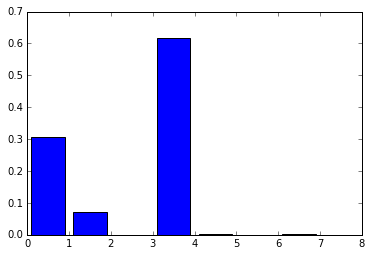

In [74]:
ind = np.arange(8) 
width = 0.1
plt.bar(ind+width, topics[0])

### Step 2
Let's make a Document. <br />
For each Document we choose from another Dirichlet to mix our topics: 


In [75]:
doc1_topic_distribution = np.random.dirichlet(alpha)

Let's check this out, too: 

In [76]:
doc1_topic_distribution

array([ 0.1310324 ,  0.14417926,  0.72478834])

Now, for each word $N_i$ in our Document, we choose a topic from a multinomial that is parameterized by our dirichlet: 

In [77]:
top = np.random.multinomial(1, doc1_topic_distribution)

In [78]:
top

array([0, 0, 1])

Then we choose the topic that the multinomial has given us and use our other dirichlet for a multinomial that generates the words: 

In [79]:
this_topic = topics[np.argmax(top)]

In [80]:
word = np.random.multinomial(1, this_topic)

In [81]:
word

array([0, 1, 0, 0, 0, 0, 0, 0])

By this process our first word is:

In [82]:
str(np.argmax(word) + 1)

'2'

The whole process to create a document with length N looks like this: 

In [83]:
def make_document(N = 30, topic_dist = None):
    if topic_dist == None:
        topic_dist = np.random.dirichlet(alpha)
    my_doc = ""
    for i in range(N):
        top = np.random.multinomial(1, topic_dist)
        this_topic = topics[np.argmax(top)]
        word = np.random.multinomial(1, this_topic)
        my_doc += str(np.argmax(word) + 1)
        my_doc += " "
    return my_doc

In [84]:
a = None
if  a == None:
    print "Hallo"

Hallo


In [85]:
make_document(topic_dist = doc1_topic_distribution)

C:\Users\mfitzke\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  from ipykernel import kernelapp as app


'6 6 2 2 8 1 2 6 8 7 2 2 5 4 6 7 8 8 3 2 3 2 2 6 2 2 2 2 8 2 '

For each document another random varable is drawn from the dirichlet to model the topic distribution of that document. 
In plate notation the graphical model that we just coded looks like this: 

<img src="https://upload.wikimedia.org/wikipedia/commons/4/4d/Smoothed_LDA.png" width="66%">

Where
- $M$ is the number of documents in the corpus
- $K$ is the number of topics
- N is the number of words per document
- $\alpha$ is the parameter for the topic distribution per document
- $\Theta$ is a dirichlet rv that represents the topic 
- $Z$ is 
- $W$ is the 
- $\beta$ is
- $\phi$

In [114]:
corpus = []
N = 30
for i in range(200): 
    topic_dist = np.random.dirichlet(alpha)
    document = zeros(8)
    for i in range(N):
        top = np.random.multinomial(1, topic_dist)
        this_topic = topics[np.argmax(top)]
        word = np.random.multinomial(1, this_topic)
        document += word
    corpus.append(document)
corpus = np.array(corpus, dtype=int64)
corpus

array([[ 2,  9,  7, ...,  4,  1,  3],
       [ 0, 10,  2, ...,  3,  0, 12],
       [ 0, 10,  8, ...,  8,  1,  3],
       ..., 
       [ 3, 14,  5, ...,  3,  0,  4],
       [10,  3,  0, ...,  0,  0,  0],
       [ 6,  3,  0, ...,  0,  0,  0]], dtype=int64)

In [115]:
import lda
model = lda.LDA(n_topics=3, n_iter=1500, random_state=42)
model.fit(corpus)

<lda.lda.LDA instance at 0x000000000F220588>

In [116]:
topic_word = model.topic_word_ 
ind = np.arange(8) 
width = 0.1

<Container object of 8 artists>

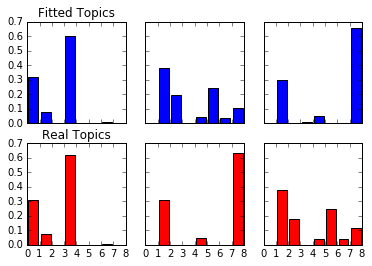

In [117]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
ax1.bar(ind+width, topic_word[0])
ax1.set_title('Fitted Topics')
ax2.bar(ind+width, topic_word[1])
ax3.bar(ind+width, topic_word[2])
ax4.set_title('Real Topics')
ax4.bar(ind+width, topics[0], color ="r")
ax5.bar(ind+width, topics[1], color ="r")
ax6.bar(ind+width, topics[2], color="r")